In [1]:
import urllib.request
import os

In [2]:
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'

In [3]:
filepath='./titanic3.xls'
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url, filepath)
    print('downloaded', result)

In [4]:
import requests


In [5]:
resp = requests.get(url)

In [6]:
resp.status_code

200

In [7]:
%pwd

'/home/shiyanlou/Ml/DeepLearning'

In [8]:
import numpy
import pandas as pd


In [9]:
all_df = pd.read_excel('titanic3.xls')

In [10]:
all_df[:2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
cols= ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp','parch', 'fare', 'embarked']

In [12]:
all_df=all_df[cols]

In [13]:
all_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


In [14]:
df = all_df.drop(['name'], axis=1)

In [15]:
all_df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [16]:
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)

In [17]:
df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)

In [18]:
df['sex'].head(10)

0    0
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    1
Name: sex, dtype: int64

In [19]:
x_OneHot_df = pd.get_dummies(data=df, columns=['embarked'])

In [20]:
x_OneHot_df[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1


In [21]:
ndarray = x_OneHot_df.values

In [22]:
ndarray.shape

(1309, 10)

In [23]:
Label = ndarray[:, 0]

In [24]:
Features = ndarray[:, 1]

In [25]:
Label[:2]

array([ 1.,  1.])

In [26]:
from sklearn import preprocessing 

In [27]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [28]:
scaledfeatures = minmax_scale.fit_transform(Features)

/home/shiyanlou/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/shiyanlou/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [29]:
scaledfeatures[:2]

array([ 0.,  0.])

In [30]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[-msk]

/home/shiyanlou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
msk = numpy.random.rand(len(all_df)) < 0.8

In [32]:
train_df = all_df[msk]

In [33]:
test_df = all_df[~msk]

In [34]:
print('total:' ,len(all_df), 
       'train' ,len(train_df), 
        'test' ,len(test_df))

total: 1309 train 1036 test 273


In [45]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['fare'].fillna(fare_mean)
    x_OneHot_df = pd.get_dummies(data=df, columns=['embarked'])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:, 1:]
    Label = ndarray[:, 0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures, Label

In [46]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label= PreprocessData(test_df)

In [48]:
train_Features[:2]

array([[ 0.        ,  0.41250333,  0.36116884,  0.        ,  0.        ,
         0.41250333,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.2958059 ,  0.0229641 ,  0.125     ,  0.22222222,
         0.2958059 ,  0.        ,  0.        ,  1.        ]])

In [49]:
msk2 = numpy.random.rand(10) < 0.8

In [50]:
msk2

array([ True,  True,  True,  True,  True,  True, False, False,  True,  True], dtype=bool)

In [51]:
~msk2

array([False, False, False, False, False, False,  True,  True, False, False], dtype=bool)

In [52]:
from keras.models import Sequential

Using TensorFlow backend.


In [53]:
from keras.layers import Dense, Dropout

In [54]:
model = Sequential()

In [55]:
model.add(Dense(units=40, input_dim=9,
                kernel_initializer='uniform', 
                activation='relu'))

In [56]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [57]:
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

In [59]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', metrics=['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________


In [62]:
train_history = model.fit(x=train_Features, 
                          y=train_Label, 
                          validation_split=0.1, 
                          epochs=30, 
                          batch_size=30, verbose=2)

Train on 932 samples, validate on 104 samples
Epoch 1/30
 - 2s - loss: 0.6896 - acc: 0.6073 - val_loss: 0.6673 - val_acc: 0.7885
Epoch 2/30
 - 1s - loss: 0.6702 - acc: 0.6127 - val_loss: 0.5861 - val_acc: 0.7885
Epoch 3/30
 - 1s - loss: 0.6421 - acc: 0.6223 - val_loss: 0.5405 - val_acc: 0.7885
Epoch 4/30
 - 1s - loss: 0.6260 - acc: 0.6567 - val_loss: 0.5289 - val_acc: 0.7885
Epoch 5/30
 - 1s - loss: 0.6164 - acc: 0.6749 - val_loss: 0.5164 - val_acc: 0.7885
Epoch 6/30
 - 1s - loss: 0.6096 - acc: 0.6770 - val_loss: 0.5246 - val_acc: 0.7788
Epoch 7/30
 - 1s - loss: 0.6065 - acc: 0.6824 - val_loss: 0.5115 - val_acc: 0.7788
Epoch 8/30
 - 1s - loss: 0.6073 - acc: 0.6803 - val_loss: 0.5127 - val_acc: 0.7788
Epoch 9/30
 - 1s - loss: 0.6010 - acc: 0.6845 - val_loss: 0.5149 - val_acc: 0.7788
Epoch 10/30
 - 1s - loss: 0.5990 - acc: 0.6770 - val_loss: 0.5162 - val_acc: 0.7788
Epoch 11/30
 - 1s - loss: 0.5986 - acc: 0.6910 - val_loss: 0.5070 - val_acc: 0.7788
Epoch 12/30
 - 0s - loss: 0.5968 - acc:

In [64]:
import matplotlib.pyplot as plt

In [65]:
def show_train_history(train_hisotry, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.show()

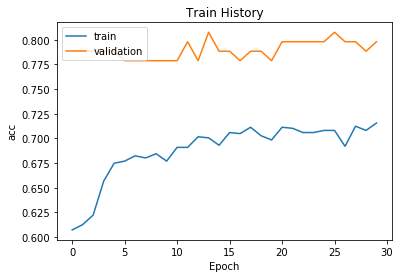

In [66]:
show_train_history(train_history,'acc', 'val_acc')

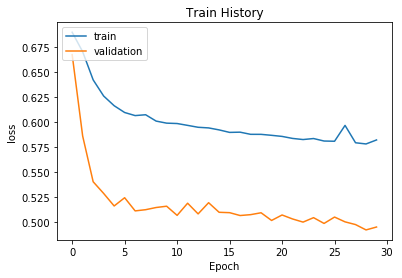

In [67]:
show_train_history(train_history, 'loss', 'val_loss')

In [68]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

273/273 [==============================] - 0s 1ms/step


In [69]:
scores[1]

0.69597069662569211

In [72]:
Jack = pd.Series([0, 'jack', 3, 'male', 23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'])

In [73]:
JR_df = pd.DataFrame([list(Jack), list(Rose)], 
                     columns=cols)

In [75]:
all_df=pd.concat([all_df, JR_df])

In [76]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [77]:
all_Features, Label=PreprocessData(all_df)

In [78]:
all_probability=model.predict(all_Features)

In [79]:
all_probability[:10]

array([[ 0.7341224 ],
       [ 0.7688939 ],
       [ 0.76762265],
       [ 0.73178506],
       [ 0.73857802],
       [ 0.40679139],
       [ 0.38177589],
       [ 0.42652938],
       [ 0.40347141],
       [ 0.43465692]], dtype=float32)

In [83]:
pd=all_df
pd.insert(len(all_df.columns), 
          'probability', all_probability)

In [84]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,jack,3,male,23.0,1,0,5.0,S,0.199580
1,1,Rose,1,female,20.0,1,0,100.0,S,0.700665


In [89]:
pd[(pd['survived'] == 0) & (pd['probability'] >0.7)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.767623
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0,1,2,151.5500,S,0.731785
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.738578
10,0,"Astor, Col. John Jacob",1,male,47.0,1,0,227.5250,C,0.721818
16,0,"Baxter, Mr. Quigg Edmond",1,male,24.0,0,1,247.5208,C,0.780557
71,0,"Clark, Mr. Walter Miller",1,male,27.0,1,0,136.7792,C,0.713594
77,0,"Compton, Mr. Alexander Taylor Jr",1,male,37.0,1,1,83.1583,C,0.700478
106,0,"Farthing, Mr. John",1,male,NaN,0,0,221.7792,S,0.737167
114,0,"Fortune, Mr. Charles Alexander",1,male,19.0,3,2,263.0000,S,0.744433
115,0,"Fortune, Mr. Mark",1,male,64.0,1,4,263.0000,S,0.726451


In [87]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.734122
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.768894
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.767623
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.731785
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.738578


In [90]:
#Where you go , I go 